# Homework Problem 0: Making sure you're set up with python
### You will need to be able to run all of these cells without error
             Boning Huang   Shunli Lu   Huizhi Li

In [63]:
import numpy as np
import pandas as pd 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
import tqdm


for i in tqdm.tqdm(range(3)):
    print("look at the pretty progress bar")


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3012.43it/s]

look at the pretty progress bar
look at the pretty progress bar
look at the pretty progress bar


In [65]:
# make sure numpy works
arr = np.arange(30).reshape(10, 3)
arr.sum(axis=0)

array([135, 145, 155])

In [39]:
# make sure pandas works
#pd.Series(range(10), index=list("abcdefghij")).plot()

In [66]:
# make sure scikit learn works
from sklearn.preprocessing import normalize

arr = np.arange(30).reshape(10, 3)
new_arr = normalize(arr)
(new_arr * new_arr).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [67]:
from keras.utils import to_categorical

arr = np.array([[1, 2, 1, 0, 5], [3, 4, 1, 0, 5]])
assert to_categorical(arr).shape == (2, 5, 6)

Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as

In [68]:
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as K
import tensorflow as tf

K.clear_session()
inpt = Input(shape=(10,))
mat = Dense(1, input_shape=(10,))

res = mat(K.variable(np.ones((10, 1))))

if tf.__version__.startswith("1"):
    print(
        f"you have tensorflow version {tf.__version__}."
        "Your code may not be compatible with everything we do in class"
    )
    result = K.eval(res)
else:
    result = res.numpy()
    assert (result == K.eval(res)).all()

print(result)

you have tensorflow version 1.10.0.Your code may not be compatible with everything we do in class
[[-0.6331781]
 [-0.6331781]
 [-0.6331781]
 [-0.6331781]
 [-0.6331781]
 [-0.6331781]
 [-0.6331781]
 [-0.6331781]
 [-0.6331781]
 [-0.6331781]]


In [69]:
K.clear_session()
inpt = Input(shape=(10,))
mat = Dense(1, input_shape=(10,))
outpt = mat(inpt)

model = Model(inpt, outpt)
model.compile("adam", loss="binary_crossentropy")
assert model.count_params() == 11
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


# Homework Problem 1: Company Descriptions from Wikipedia
Downloading data from the web is a large part of working with text.
Importantly, it can be difficult to find the __right__ data. 
Here, we will download the company descriptions from wikipedia for the current set of S&P500 companies. 

## The `wikipedia` package
You can install it with `pip install wikipedia`

We will use `wikipeda.page` to grab data
```python
import wikipedia

page = wikipedia.page(page_url)
print(page.content)
```

In [70]:
import numpy as np
import pandas as pd
%pylab inline

from tqdm import tqdm
import wikipedia

Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Part 0: get the list of the S&P500 companies
### Hint, a `wikipedia` page has a method `html()` which returns the html from the page
### pandas has `read_html` https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html

In [71]:
sp500_url = 'List_of_S%26P_500_companies'
# your code here
sp500 = pd.read_html(wikipedia.page(sp500_url).html())[0]

In [72]:
%store sp500

Stored 'sp500' (DataFrame)


In [73]:
%store -r result

In [74]:
sp500

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [75]:
list(sp500.Security)

['3M Company',
 'Abbott Laboratories',
 'AbbVie Inc.',
 'ABIOMED Inc',
 'Accenture plc',
 'Activision Blizzard',
 'Adobe Inc.',
 'Advanced Micro Devices Inc',
 'Advance Auto Parts',
 'AES Corp',
 'AFLAC Inc',
 'Agilent Technologies Inc',
 'Air Products & Chemicals Inc',
 'Akamai Technologies Inc',
 'Alaska Air Group Inc',
 'Albemarle Corp',
 'Alexandria Real Estate Equities',
 'Alexion Pharmaceuticals',
 'Align Technology',
 'Allegion',
 'Alliant Energy Corp',
 'Allstate Corp',
 'Alphabet Inc. (Class A)',
 'Alphabet Inc. (Class C)',
 'Altria Group Inc',
 'Amazon.com Inc.',
 'Amcor plc',
 'Ameren Corp',
 'American Airlines Group',
 'American Electric Power',
 'American Express Co',
 'American International Group',
 'American Tower Corp.',
 'American Water Works Company Inc',
 'Ameriprise Financial',
 'AmerisourceBergen Corp',
 'AMETEK Inc.',
 'Amgen Inc.',
 'Amphenol Corp',
 'Analog Devices, Inc.',
 'ANSYS',
 'Anthem',
 'Aon plc',
 'A.O. Smith Corp',
 'Apache Corporation',
 'Apartment I

## Part 2: For every S&P500 company, get the page content

In [126]:
import json
# your code here. We suggest that you save your results
# to a json file so that you don't need to re-scrape

result = []
for i in range(len(list(sp500.Security))):
    try:
        content = wikipedia.page(list(sp500.Security)[i]).content
    except:
        content = wikipedia.WikipediaPage(list(sp500.Security)[i]).content

    result.append(content)

In [125]:
print('found {} results'.format(len(result)))

found 505 results


In [127]:
import json
for i in range(len(result)):
    with open('S&P500 companies.json', 'w', encoding="utf-8") as infile:
        infile.write(result[i])
print("found {} results".format(len(result)))

found 505 results


In [75]:
%store result

Stored 'result' (list)


In [77]:
%store -r result

In [128]:
print(len(result[1]))

15689


## Part 3: Content length
 - For every page, compute the length of the text (how many characters)
 - What is the mean length(number of characters) for each gics sector. 

In [129]:
# your code here
length = []
for i in range(len(result)):
    length.append(len(result[i]))
    

In [130]:
d = {'company':list(sp500.Security),'text_len':length}

In [131]:
company_content = pd.DataFrame(d)

In [132]:
company_content

,company,text_len
0,3M Company,17739
1,Abbott Laboratories,15689
2,AbbVie Inc.,6967
3,ABIOMED Inc,5937
4,Accenture plc,13044
...,...,...
500,Yum! Brands Inc,9571
501,Zebra Technologies,2627
502,Zimmer Biomet Holdings,3694
503,Zions Bancorp,5610


In [141]:
company_content['GICS sector'] = list(sp500['GICS Sector'])

In [142]:
company_content.groupby('GICS sector').mean()

,text_len
GICS sector,
Communication Services,25932.807692
Consumer Discretionary,17464.180328
Consumer Staples,16523.939394
Energy,11498.500000
Financials,14414.818182
Health Care,10973.338710
Industrials,11234.712329
Information Technology,17444.521127
Materials,7320.428571


## Part 4: Count how many times `computer` appears in the content for each company
 - what is the mean number of times it occurs in each sector?
 - Do these results make sense

In [3]:
# your code here

In [135]:
words = ['computer']

# one way to do this is to make a dataframe of counts,
# initialize all to 0, and then loop through and count the occurences
counts = pd.DataFrame(0, index=sp500.Symbol.tolist(), columns=words)

In [136]:
for i in range(len(result)):
    text = result[i].lower()
    for word in words:
        counts.iloc[i][word] = sum(1 for match in re.finditer(r"\b%s\b" %re.escape(word), text))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [137]:
counts

,computer
MMM,0
ABT,0
ABBV,0
ABMD,0
ACN,4
...,...
YUM,0
ZBRA,1
ZBH,0
ZION,0


In [139]:
counts['GICS sector'] = list(sp500['GICS Sector'])

In [145]:
counts.groupby('GICS sector').mean()

,computer
GICS sector,
Communication Services,0.615385
Consumer Discretionary,0.360656
Consumer Staples,0.060606
Energy,0.153846
Financials,0.181818
Health Care,0.225806
Industrials,0.438356
Information Technology,3.014085
Materials,0.000000


## Part 5: repeat part 4 with lots of words
 - try `['computer', 'oil', 'debt', 'drug', 'building', 'food']`
 - add your own words

In [146]:
words = ['computer', 'oil', 'debt', 'drug', 'building', 'food','meeting','technology']

# one way to do this is to make a dataframe of counts,
# initialize all to 0, and then loop through and count the occurences
counts = pd.DataFrame(0, index=sp500.Symbol.tolist(), columns=words)

# your code here

In [147]:
for i in range(len(result)):
    text = result[i].lower()
    for word in words:
        counts.iloc[i][word] = sum(1 for match in re.finditer(r"\b%s\b" %re.escape(word), text))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [148]:
counts

,computer,oil,debt,drug,building,food,meeting,technology
MMM,0,0,1,0,4,0,0,6
ABT,0,0,0,4,0,0,0,4
ABBV,0,0,0,8,0,0,0,3
ABMD,0,0,0,0,0,0,0,4
ACN,4,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...
YUM,0,0,1,0,0,10,0,0
ZBRA,1,0,0,0,0,0,0,1
ZBH,0,0,0,0,0,0,0,1
ZION,0,0,0,0,1,0,0,0


In [149]:
counts['GICS sector'] = list(sp500['GICS Sector'])

In [150]:
counts.groupby('GICS sector').mean()

,computer,oil,debt,drug,building,food,meeting,technology
GICS sector,,,,,,,,
Communication Services,0.615385,0.000000,0.884615,0.153846,2.115385,0.384615,0.423077,2.269231
Consumer Discretionary,0.360656,0.213115,0.475410,0.163934,1.311475,2.770492,0.131148,1.311475
Consumer Staples,0.060606,0.787879,0.181818,0.484848,0.606061,6.606061,0.030303,0.454545
Energy,0.153846,19.846154,0.192308,0.000000,0.884615,0.115385,0.115385,0.807692
Financials,0.181818,0.560606,0.666667,0.060606,1.803030,0.106061,0.287879,0.787879
Health Care,0.225806,0.032258,0.306452,4.677419,0.225806,0.822581,0.064516,1.467742
Industrials,0.438356,0.630137,0.232877,0.027397,1.232877,0.287671,0.027397,1.986301
Information Technology,3.014085,0.154930,0.169014,0.014085,0.774648,0.084507,0.197183,7.267606
Materials,0.000000,0.714286,0.071429,0.000000,0.964286,1.500000,0.178571,1.178571


## Problem 2: Obtain structured company data using Regex (20%)

In [151]:
%pylab inline
import re
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [152]:
wiki_df = pd.read_csv('kdwd_r1k_articles.csv')
wiki_df.head(2)

,page_id,page_title,page_views,intro_text
0,856,Apple Inc.,190485,Apple Inc. is an American multinational techno...
1,2386,American Airlines,40829,"American Airlines, Inc. (AA) is a major Americ..."


### -) Write a regex to find unusually capitalized terms
Sometimes product names will have unusual capitalization such as iPhone or ThinkPad. Find a list of such terms and investigate if you think some of them are products.

In [153]:
maybe_products_ptn = r'\b[a-zA-z]+[A-Z]+[a-z]+\b'# find the correct regular expression here

# code here!
info_list = wiki_df['intro_text'].tolist()
maybe_products_set = []
for i in range(len(info_list)):
    maybe_products_set.extend(re.findall(maybe_products_ptn,info_list[i]))
maybe_products_set = sorted(set(maybe_products_set))
print(len(maybe_products_set), 'terms found that are potential products')

shouldbe_products_set = [ 'AirPods','AppleCare','BankAmericard', 'EpiPen',  'HomePod', 'ThinkCentre', 'ThinkPad', 'WaterSeal','WoodWick', 'ZonePerfect', 'iLife', 'iMac', 'iPad', 'iPhone', 'iPod']

print("After investigation, only around " + str(len(shouldbe_products_set)) +" are products")

267 terms found that are potential products
After investigation, only around 15 are products


In [154]:
# verify that we found some of the key terms
assert('iPhone' in maybe_products_set)
assert('ThinkPad' in maybe_products_set)

### -) Parse company acquisition data from plain text

We are looking to identify the following types of patterns.<br />
`'Citrix acquired Sequoia Software Corp'`<br />
`'Moody\'s was acquired by Dun & Bradstreet in 1962.'`<br />
The idea here is to look for patterns around the word 'acquire' with two valid entities on either side, and an option year at the end.<br />
<span style="color:orange">Helpful Reminder:</span> you can create non-capturing capture groups via `(?:capture this|or that)`

In [155]:
# find a way to capture, 'FedEx', 'Coca-Cola', 'Sequoia Software Corp', 'Dun & Bradstreet' and 'Moody\'s'
company_ptn = r'(?:[A-Z]+[a-z]+\s)?[A-Z]+[a-z]+(?:\-|\s\&\s|\s+|\')?[A-Z]?[a-z]+'  # write pattern

# code here!
search_result2 = []
for i in range(len(info_list)):
    search_result2.extend(re.findall(company_ptn,info_list[i]))
 
maybe_companies_set = sorted(set(search_result2))
print(len(maybe_companies_set), 'terms found that are potential companies')

7954 terms found that are potential companies


In [156]:
# verify that we found some of the key terms
list_keyterm = ['FedEx', 'Coca-Cola', 'Sequoia Software Corp', 'Dun & Bradstreet','Moody\'s']
for item in list_keyterm:
    if item in maybe_companies_set:
        print("Found " + item)
    else:
        print("Didn't find " + item)

Found FedEx
Found Coca-Cola
Found Sequoia Software Corp
Found Dun & Bradstreet
Found Moody's


In [157]:
# acquisition pattern
acquisition_ptn = r'(?:acquired|was acquired by)'

# find a way to optionally capture the year such as ' in 1962'
optional_year_ptn = r'(?: in [12][0-9]{3}\b)?'

In [158]:
# let's assemble the patterns together to a full capture pattern
full_acquisition_pattern = (
    company_ptn + r'\s+' + acquisition_ptn + r'\s+' + company_ptn + optional_year_ptn
)

In [159]:
acquisition_strings = []
for _, row in wiki_df.iterrows():
    acquisition_strings.extend(re.findall(full_acquisition_pattern, row['intro_text']))
print(len(acquisition_strings), 'potential acquisitions found.')

20 potential acquisitions found.


In [160]:
# verify that we found some of the key terms
list_keyterm2 = ["Citrix acquired Sequoia Software Corp", "Moody\'s was acquired by Dun & Bradstreet in 1962"]
for item in list_keyterm2:
    if item in acquisition_strings:
        print("Found " + item)
    else:
        print("Didn't find " + item)

Found Citrix acquired Sequoia Software Corp
Found Moody's was acquired by Dun & Bradstreet in 1962


### -) Question: Are there any failures false positives in your results? If so, how could you account for them?

In [161]:
# brief answer here
print(acquisition_strings)
print(maybe_companies_set)

['Citrix acquired Sequoia Software Corp', 'Citrix acquired Framehawk and', 'Aflac acquired Continental American Insurance', 'Giannini acquired Banca d', "Moody's was acquired by Dun & Bradstreet in 1962", 'Brookfield acquired Rouse Properties in', 'Medtronic acquired Irish', 'Limited acquired Chubb in', 'Lottomatica acquired Gtech Corporation', 'Group acquired OneWest', 'Advance Auto Parts acquired Carport Auto Parts', 'Advance acquired Discount Auto Parts', 'Thermo Fisher acquired Life Technologies Corporation', 'The company acquired Questar gas', 'Keurig Green Mountain acquired Dr Pepper Snapple', 'Gendex Corporation acquired Dentsply International Inc', 'Sovran Self Storage acquired LifeStorage', "Novartis acquired Incyte's", 'Colfax acquired British Charter International', 'Further Colfax also acquired Allweiler']
['ABInBev', 'ADMMicro', 'AFVs ever', 'AMOLEDs on', 'ATMs across', 'ATMs located', 'ATMs of', 'Aachen', 'Aaron Brothers Custom', 'Aaron Scheinfeld', 'AbbVie', 'Abbey Natio

There are definitely several false positives such as 'Chinese', 'Inc.', and 'Also' in maybe_companies_set. Such failures are caused by the pattern codes which are identifying suitable words with the only standards of being around 'acquired' and obtaining a leading Capitalized character.

### -) Let's look into speed of regex matching

In [162]:
# write a simple pattern of your choice to search for in our dataset
search_ptn = r'iPhone'

In [163]:
# assemble a list of strings
doc_list = wiki_df['intro_text'].tolist()

In [164]:
%%timeit
# evaluation loop here
for doc in doc_list:
    re.search(search_ptn,doc)

1.07 ms ± 35.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Let's compile the regex and see if this increases the speed using `re.compile`

In [165]:
%%timeit
# evaluation loop here
prog = re.compile(search_ptn)
for doc in doc_list:
    result = prog.search(doc)

732 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### A note on speed: basic string operations are always faster than regex
#### show this using `'my_string' in 'other_string'`

In [ ]:
# code here!

In [166]:
%%timeit
# evaluation loop here
for doc in doc_list:
    'iPhone' in doc

577 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [167]:
%%timeit
for doc in doc_list:
    re.search('iPhone',doc)

1.05 ms ± 43.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Problem 3: Key corporate concepts (20%)

### In this problem we would like to look at how important certain key terms are across various different companies in the wikipedia dataset

### Do this for the terms `apple`, `cloud`, `healthcare` and `personal computers`
### Which companies use each of these terms the most?

### Hint: you can do this several different ways, but you may want to consider tf-idf, since it will help you for the next Problem

In [168]:
# code here!
from sklearn.feature_extraction.text import TfidfVectorizer

wiki_df = pd.read_csv('kdwd_r1k_articles.csv')
vectorizer = TfidfVectorizer(
    
    analyzer='word',
    token_pattern='(?u)\\b\\w\\w+\\b',
    
    lowercase=True,
    stop_words=None,

    ngram_range=(1, 2),
    
    min_df=3,
    max_df=1.0,
    
)
count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist())

In [169]:
words = ['apple', 'cloud', 'healthcare', 'personal computers']

In [170]:
company_list = list(wiki_df['page_title'])

In [171]:
index_list = [vectorizer.vocabulary_[word] for word in words]

In [172]:
tf_idf = pd.DataFrame(columns=words, index = company_list)

In [173]:
for company in company_list:
    for index in index_list:
        tf_idf.loc[company][words[index_list.index(index)]] = count_matrix[company_list.index(company), index]

In [174]:
tf_idf

,apple,cloud,healthcare,personal computers
Apple Inc.,0.714075,0,0,0.0234897
American Airlines,0,0,0,0
Advanced Micro Devices,0,0,0,0.0881501
Anthem,0,0,0,0
Coca-Cola,0.0281244,0,0,0
...,...,...,...,...
Diamondback Energy,0,0,0,0
The Michaels Companies,0,0,0,0
Cheniere Energy,0,0,0,0
CNX Resources,0,0,0,0


In [175]:
apple = tf_idf['apple'].sort_values(ascending=False).head(1)

In [176]:
cloud = tf_idf['cloud'].sort_values(ascending=False).head(1)

In [177]:
healthcare = tf_idf['healthcare'].sort_values(ascending=False).head(1)

In [178]:
pc = tf_idf['personal computers'].sort_values(ascending=False).head(1)

In [179]:
matrix = pd.DataFrame(pd.concat([apple, cloud,healthcare,pc], axis=0))

In [180]:
matrix.columns = ['tf_idf']

In [181]:
matrix

,tf_idf
Apple Inc.,0.714075
Okta,0.425402
Medical Properties Trust,0.318664
Dell Technologies,0.109135


## Problem 4: Measure company similarity through word overlap (20%)

### We would like to understand how similar different companies are based on the words used in their wikipedia description. Presumably a company providing shipping services will have few words overlapping with a technology company. The goal of this exercise is to group companies based on their description and see if we can recover groups that resemble industry sectors.

### Question: There are a few ways of doing this. Two ways that we learned, are counting (using CountVectorizer) or using the tfidf score (using TfidfVectorizer). What are the main differences between these methods for this exercise and why are you choosing to use one over the other?

### Find the cosine similarity between words from Apple and Coca-Cola as well as Apple and Microsoft. Which pair is more similar?

In [182]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [183]:
apple_row_nr = 0
cocacola_row_nr = 4
microsoft_row_nr = 8

# get similarity between each of these

# code here!
# create the doc-term matrix
vectorizer = TfidfVectorizer(
    analyzer = "word",
    token_pattern = '(?u)\\b\\w\\w+\\b',
    lowercase=True,
    stop_words = None,
    ngram_range = (1,2),
    min_df = 3,
    max_df = 1.0,
)
count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());
Apple_CocaCola = cosine_similarity(count_matrix[apple_row_nr], count_matrix[cocacola_row_nr])
Apple_Microsoft = cosine_similarity(count_matrix[apple_row_nr], count_matrix[microsoft_row_nr])
print(Apple_CocaCola)
print(Apple_Microsoft)

[[0.10413787]]
[[0.33154482]]


Apple and Microsoft are more similar than Apple and Coca Cola

### Next, let's look at a fullblown NxN similarity matrix. Luckily scikit-learn has this optimized for sparse matrices, so we don't need to worry about computation explosion. A nice way to look at the resulting similarity matrix between our companies is a method called hierarchical clustering. (find more information here: https://en.wikipedia.org/wiki/Hierarchical_clustering)

### The seaborn library has nice built-in support for doing this: https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [184]:
# similarity_matrix = 
similarity_matrix = cosine_similarity(count_matrix)

D:\anaconda\lib\site-packages\seaborn\matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


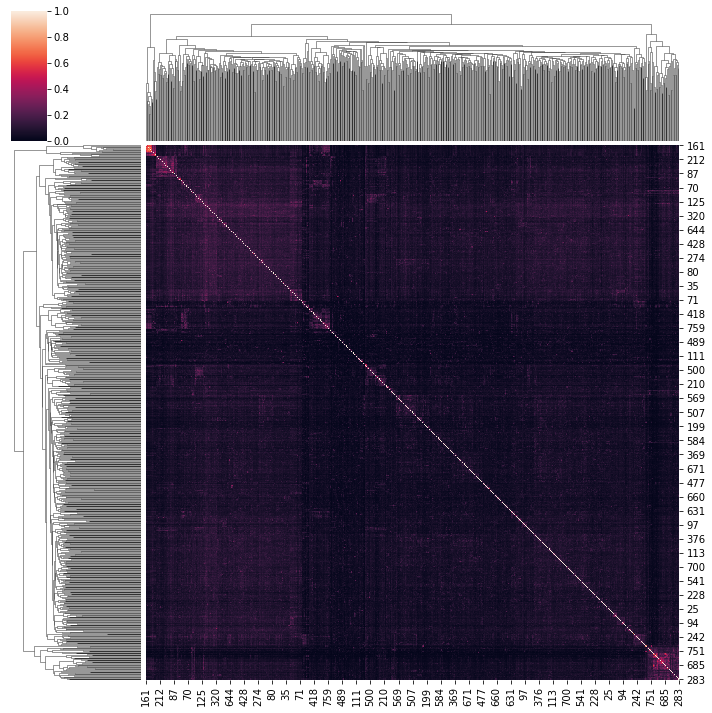

In [185]:
import seaborn as sns

# code for plot here
sns.clustermap(similarity_matrix)

### To investigate the output a little further let's zoom into the top left where we can find the most strongly clustered companies. Question: which companies are these and what industry sector do they belong to?

### Hint: You can access the clustered data from the seaborn plot using `.data2d`

,161,390,680,706,703,716,756,552,681,745,...,74,347,750,707,742,445,663,455,177,283
161,1.000000,0.478470,0.431744,0.496935,0.451680,0.410192,0.542441,0.470067,0.429759,0.504777,...,0.100931,0.147038,0.039298,0.027751,0.041377,0.039183,0.164660,0.102560,0.117075,0.052308
390,0.478470,1.000000,0.520648,0.520295,0.670136,0.588276,0.626802,0.653406,0.548695,0.536840,...,0.042493,0.040065,0.029996,0.024333,0.035884,0.027836,0.142448,0.046272,0.111398,0.049174
680,0.431744,0.520648,1.000000,0.594389,0.595674,0.619882,0.641243,0.575835,0.612551,0.518750,...,0.039244,0.075744,0.026657,0.031027,0.032264,0.042341,0.109761,0.078777,0.084199,0.045960
706,0.496935,0.520295,0.594389,1.000000,0.629201,0.622898,0.672864,0.617427,0.670125,0.654999,...,0.036613,0.068956,0.043404,0.036073,0.036217,0.042877,0.069765,0.075087,0.076676,0.049211
703,0.451680,0.670136,0.595674,0.629201,1.000000,0.619928,0.731297,0.765752,0.682762,0.580733,...,0.034090,0.073317,0.026395,0.032074,0.033575,0.043797,0.102807,0.068080,0.068112,0.041603


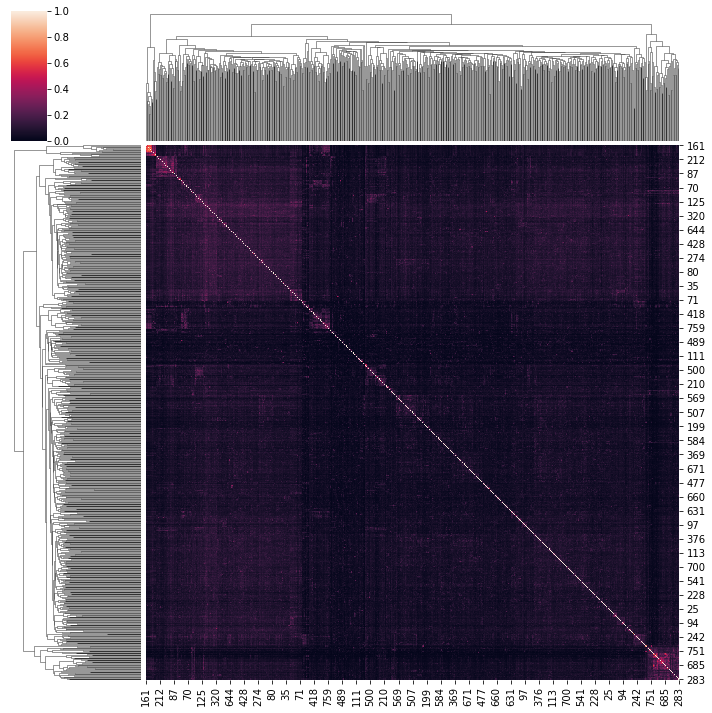

In [186]:
# code here
map_data = sns.clustermap(similarity_matrix).data2d
map_data.head()

In [187]:
target_companies = list(map_data.index[:10])
wiki_df.loc[target_companies]


,page_id,page_title,page_views,intro_text
161,858226,Cabot Oil & Gas,783,Cabot Oil & Gas Corporation is a company engag...
390,4140640,Energen,533,Energen Corporation was a company engaged in h...
680,42272586,Cimarex Energy,611,Cimarex Energy Co. is a company engaged in hyd...
706,46676397,Whiting Petroleum Corporation,550,Whiting Petroleum Corporation is a company eng...
703,46390509,WPX Energy,642,"WPX Energy, Inc. (Williams Production and Expl..."
716,48623992,Concho Resources,783,Concho Resources Inc. is a company engaged in ...
756,59351825,Diamondback Energy,1023,Diamondback Energy is a company engaged in hyd...
552,19706909,Pioneer Natural Resources,1386,Pioneer Natural Resources Company is a company...
681,42274979,SM Energy,535,SM Energy Company is a company engaged in hydr...
745,54485346,Antero Resources,762,Antero Resources Corporation is a company enga...


These are companies in the energy / oil and gas sector.